## class built-in methods

In [23]:
class Foo(object):
    def __init__(self, val):
        print('__init__')
        self.val = val
    
    def __call__(self, a, b, c):
        print('__call__')        
        print('a, b, c = {}'.format(str([a,b,c])))

# __init__
obj = Foo(10)

# __call__
obj(1,2,3)
        

__init__
__call__
a, b, c = [1, 2, 3]


## Buit-in Functions

### filter

```
filter(function, sequence) 
```

In [7]:
fibonacci = [0,1,1,2,3,5,8,13,21,34,55]
odd_numbers = list(filter(lambda x: x % 2, fibonacci))
print(odd_numbers)

[1, 1, 3, 5, 13, 21, 55]


### map

```
r = map(func, seq)
```

In [11]:
# Python 3 returns iterator
list(map(str, range(10)))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [12]:
C = [39.2, 36.5, 37.3, 38, 37.8]
F = list(map(lambda x: (float(9)/5)*x + 32, C))
print(F)

[102.56, 97.7, 99.14, 100.4, 100.03999999999999]


### Reduce

```
reduce(func, seq) 
```

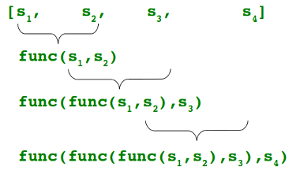

In [13]:
import functools

functools.reduce(lambda x,y: x+y, [47,11,42,13])

113

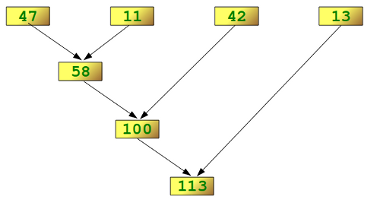

## Decorator without Arguments

Reference: [Decorators I: Introduction to Python Decorators](http://www.artima.com/weblogs/viewpost.jsp?thread=240808)

In [28]:
import functools

def welcome(f):
    @functools.wraps(f) # this is to make docstring correct
    def decorated(*args, **kwargs):
        print('welcome!')
        
        return f(*args, **kwargs)

    return decorated

print('------ without decorator --------')
def foo(name):
    print(name)

foo('pppk')

print('------ with decorator --------')
@welcome
def foo(name):
    print(name)

foo('pppk')



------ without decorator --------
pppk
------ with decorator --------
welcome!
pppk


## Decorator with Arguments

Reference: [Python Decorators II: Decorator Arguments](http://www.artima.com/weblogs/viewpost.jsp?thread=240845)

In [32]:
def welcome(greeting):
    def decorator(f):
        @functools.wraps(f) # this is to make docstring correct
        def decorated(*args, **kwargs):
            print(greeting)
            return f(*args, **kwargs)

        return decorated
    return decorator

@welcome('您好')
@welcome('歡迎光臨')
def foo(name):
    print(name)

foo('pppk')

您好
歡迎光臨
pppk


## Meta Class

Reference: https://stackoverflow.com/questions/100003/what-is-a-metaclass-in-python

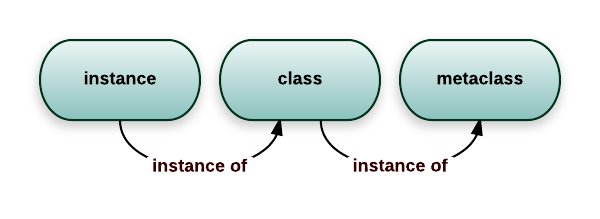

In [50]:
class Foo(object):
    pass

print(Foo)

# you use class Foo to create an instance
obj = Foo()
print('{}: type = {}'.format(obj, type(obj)))
print('obj class: {}'.format(obj.__class__))

print('')

# but actually class Foo is also an object (class object) so you can assign attributes to it
print(hasattr(Foo, 'new_attr'))
Foo.new_attr = 'new'
print(hasattr(Foo, 'new_attr'))

print('')

# class object Foo is created by its meta class, type
print('obj class.class: {}'.format(obj.__class__.__class__))

print('')

# you can also do it yourself, without class definition
Foo = type('Foo', (object,), {'new_attr': 'new'})
print(Foo)
print(hasattr(Foo, 'new_attr'))


<class '__main__.Foo'>
<__main__.Foo object at 0x7fd9bc1c68d0>: type = <class '__main__.Foo'>
obj class: <class '__main__.Foo'>

False
True

obj class.class: <class 'type'>

<class '__main__.Foo'>
True


### customized meta class

```
__metaclass__ can actually be any callable, it doesn't need to be a formal class
```

In [82]:
# remember that `type` is actually a class like `str` and `int`
# so you can inherit from it
class UpperAttrMetaclass(type):
    # __new__ is the method called before __init__
    # it's the method that creates the object and returns it
    # while __init__ just initializes the object passed as parameter
    # you rarely use __new__, except when you want to control how the object
    # is created.
    # here the created object is the class, and we want to customize it
    # so we override __new__
    # you can do some stuff in __init__ too if you wish
    # some advanced use involves overriding __call__ as well, but we won't
    def __new__(cls, clsname, bases, dct):
        print('UpperAttrMetaClass: __new__')
        uppercase_attr = {}
        for name, val in dct.items():
            if not name.startswith('__'):
                uppercase_attr[name.upper()] = val
            else:
                uppercase_attr[name] = val

        return super(UpperAttrMetaclass, cls).__new__(cls, clsname, bases, uppercase_attr)        
    
class Foo(metaclass=UpperAttrMetaclass):
    # the following line is for python 2, python 3 use metaclass=xxx in declaration
    #__metaclass__ = UpperAttrMetaclass
    
    name = 'foo'
    address = 'home'

foo = Foo()
print(foo.__class__.__class__)
print(dir(foo))

UpperAttrMetaClass: __new__
<class '__main__.UpperAttrMetaclass'>
['ADDRESS', 'NAME', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']


### singleton metaclass

In [86]:
class MetaSingleton(type):
    instance = None
    
    def __call__(cls, *args, **kw):
        if cls.instance is None:
            cls.instance = super(MetaSingleton, cls).__call__(*args, **kw)
            
        return cls.instance

class Foo(metaclass=MetaSingleton):
    pass

a = Foo()
b = Foo()
    
print(a is b)

True


## Lambda

Just a fancy name for creating anonymous function.

In [5]:
def add(x, y):
    return x + y

print(add(1, 2))

add = lambda x, y: x + y

print(add(1, 2))

# generally use in
mult3 = filter(lambda x: x % 3 == 0, [1, 2, 3, 4, 5, 6, 7, 8, 9])
print(list(mult3))


3
3
[3, 6, 9]


## Supress Warnings

https://docs.python.org/2/library/warnings.html#temporarily-suppressing-warnings

In [7]:
import warnings

# warning
warnings.warn("deprecated", DeprecationWarning)

# wrap it in warning context manager
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    
    # the warning wouldn't show now
    warnings.warn("deprecated", DeprecationWarning)
    
    '''
    Now import packages with DeprecationWarning is fine, such as xgboost
    '''
    #import xgboost
    

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: deprecated
  after removing the cwd from sys.path.


## _ underscore usages in Python

[Understanding the underscore( _ ) of Python](https://hackernoon.com/understanding-the-underscore-of-python-309d1a029edc)

#### Has the last result when it's used in interpreter

In [4]:
10 * 20

200

In [5]:
_

200

#### For ignoring the value

In [8]:
for _ in range(5):
    print("do something, don't care the index")

do something, don't care the index
do something, don't care the index
do something, don't care the index
do something, don't care the index
do something, don't care the index


#### make it private (_single_leading_underscore)

> Anything with this convention are ignored in from module import *.

> However, of course, Python does not supports truly private, so we can not force somethings private ones and also can call it directly from other modules. So sometimes we say it “weak internal use indicator”.

#### avoid conflicting with (single_trailing_underscore_)

> This convention could be used for avoiding conflict with Python keywords or built-ins. You might not use it often.

#### name mangling with (__double_leading_underscore)

> Basically for name mangling. Sometimes, some people use it as like real private ones using these features, but it is not for private and not recommended for that. For more details, read Python Naming.

#### magic method (__double_leading_and_trailing_underscore__)

> This convention is used for special variables or methods (so-called “magic method”) such as \__init\__, \__len\__. These methods provides special syntactic features or does special things. For example, \__file\__ indicates the location of Python file, \__eq\__ is executed when a == b expression is excuted. 